# Importations et Nettoyage de la base de données : 

In [9]:
import sys
import os

# Ajouter src au chemin d'importation
# A adapter selon le système d'exploitation

sys.path.append(os.path.abspath("../src"))



import pandas as pd
from utils import Nettoyage
import sqlite3

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import gt
from utils import graphique as rep
import pygwalker as pyg


import seaborn as sns

In [10]:
path_load = '/Users/f.b/Desktop/Data_Science/watch_market/watch_price_prediction/data/raw/montre.db'
path_save = '/Users/f.b/Desktop/Data_Science/watch_market/watch_price_prediction/data/raw/base.xlsx'

In [11]:
def chargement_base(path_load, path_save):
   
        connexion = sqlite3.connect(path_load)

        # Exécution d'une requête SQL pour récupérer des données et conversion en DataFrame
        df = pd.read_sql_query('SELECT * FROM montre', connexion)

        # Fermeture de la connexion
        connexion.close()

        # Conversion de la base en format CSV 
        
        df.to_excel(path_save)

        # Chargement de la BDD sans la colonne id: 
        df = df.iloc[:, 1:]
        return df 

In [12]:
df = chargement_base(path_load, path_save)
nettoyage = Nettoyage(df)

# Nettoyage préliminaire

In [13]:
df = nettoyage.nettoyage_colonnes()

In [14]:
colonnes_a_renseigner = ['matiere_boitier',
                         'matiere_bracelet',
                         'sexe',
                         'diametre',
                         'etencheite',
                         'matiere_lunette',
                         'matiere_verre',
                         'boucle',
                         'matiere_boucle',
                         'rouage',
                         'reserve_de_marche', 
                         'mouvement']

for col in colonnes_a_renseigner:
    df = nettoyage.remplissage(col)

In [15]:
df = nettoyage.remplissage_mouvement()
df = nettoyage.remplissage_reserve_marche()
df = nettoyage.compteur_complications('fonctions')
df = nettoyage.suppression_colonnes()

# Mise au format adéquat des variables  

In [16]:
df = nettoyage.mise_en_forme()
df = nettoyage.nettoyer_matiere_boitier()
df = nettoyage.matiere()
df = nettoyage.mapping_matiere()
df = nettoyage.regroupement_etat_montres()
df = nettoyage.extraction_elements_avant_euro()
df = nettoyage.nettoyage_prix('prix')
df = nettoyage.extraction_integer()

# Analyse descriptive :

In [17]:
rep = rep(df)

In [18]:
#walker = pyg.walk(df, HideDataSourceConfig=True, theme='vega')

# Objectifs

Cette base de données a été créée à partir des informations collectées sur le site de vente de montres de luxe d’occasion Chrono24. La période de collecte des données s’étend de mars à octobre 2024.

Elle regroupe des détails sur les caractéristiques des montres de luxe vendues par des hommes et des femmes. L’objectif principal de ce travail est d’explorer comment ces caractéristiques influencent le prix de vente des montres.

Pour atteindre cet objectif, une analyse descriptive sera d’abord réalisée afin de mieux comprendre les tendances et les spécificités de notre jeu de données. Ensuite, un modèle prédictif sera développé pour estimer, de manière optimale, le prix de vente d’une montre de luxe en fonction de ses caractéristiques.

In [19]:
f"La base de données contient {len(df)} offres de montres hommes/femmes"    

'La base de données contient 33018 offres de montres hommes/femmes'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33018 entries, 0 to 68057
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marque              33018 non-null  object 
 1   modele              33018 non-null  object 
 2   mouvement           32970 non-null  object 
 3   matiere_boitier     32633 non-null  object 
 4   matiere_bracelet    30154 non-null  object 
 5   etat                33018 non-null  object 
 6   sexe                32674 non-null  object 
 7   prix                31744 non-null  float64
 8   reserve_de_marche   29308 non-null  float64
 9   diametre            32599 non-null  float64
 10  etencheite          29181 non-null  float64
 11  matiere_lunette     31418 non-null  object 
 12  matiere_verre       31516 non-null  object 
 13  boucle              31881 non-null  object 
 14  matiere_boucle      31994 non-null  object 
 15  comptage_fonctions  33018 non-null  int64  
 16  pays     

In [21]:
round(df.isnull().sum()/len(df),2)*100

marque                 0.0
modele                 0.0
mouvement              0.0
matiere_boitier        1.0
matiere_bracelet       9.0
etat                   0.0
sexe                   1.0
prix                   4.0
reserve_de_marche     11.0
diametre               1.0
etencheite            12.0
matiere_lunette        5.0
matiere_verre          5.0
boucle                 3.0
matiere_boucle         3.0
comptage_fonctions     0.0
pays                   0.0
dtype: float64

## Analyse bivariée : 

On va étudier l'influence des caractéristiques des montres sur le prix de ces dernières.
Pour ce faire, nous allons étudier la relation des diffférentes variables avec notre variable cible, à savoir le prix. 

In [22]:
# Création d'une variable de prix en logarithme qui nous sera utile lors de modélisation pour respecter les hypothèses des modèles.
df['prix_log'] = np.log(df['prix'])

# Création d'une variable de prix déflatée de 6%. ==> 
# Tiens compte de la commission appliquée sur le prix de vente
df['prix_sc'] = df['prix']*(1-0.06)

df['prix_log'] = np.log(df['prix_sc'])

### Provenance des montres sur Chrono24

In [23]:
effectif = rep.effectif_pays()
rep.fig_pays(effectif)

In [24]:
rep.tab_pays(effectif)

               Provenance des montres               
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃        Pays        ┃ Nombre de montres ┃       % ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│       FRANCE       │             11579 │ 35.07 % │
│     ALLEMAGNE      │              4310 │ 13.05 % │
│       ITALIE       │              3481 │ 10.54 % │
│     ÉTATS-UNIS     │              2995 │  9.07 % │
│      BELGIQUE      │              2167 │  6.56 % │
│      PAYS-BAS      │              1328 │  4.02 % │
│      ESPAGNE       │              1085 │  3.29 % │
│    ROYAUME-UNI     │              1033 │  3.13 % │
│       JAPON        │               872 │  2.64 % │
│      POLOGNE       │               518 │  1.57 % │
│       SUÈDE        │               383 │  1.16 % │
│     HONG_KONG      │               378 │  1.14 % │
│      AUTRICHE      │               352 │  1.07 % │
│       SUISSE       │               298 │  0.90 % │
│      DANEMARK      │               200 │  0.61 % │
│ RÉPUBLIQUE_TCHEQUE │               141 │  0.43 % │
│       GRÈCE        │               127 │  0.38 % │
│      LITUANIE      │               112 │  0.34 % │
│     SINGAPOUR      │                97 │  0.29 % │
│      ROUMANIE      │                94 │  0.28 % │
│      PORTUGAL      │                93 │  0.28 % │
│      INCONNU       │                89 │  0.27 % │
│ EMIRAT_ARABE_UNIS  │                88 │  0.27 % │
│      UKRAINE       │                78 │  0.24 % │
│      MALAISIE      │                71 │  0.22 % │
│       MONACO       │                70 │  0.21 % │
│      HONGRIE       │                66 │  0.20 % │
│       CANADA       │                63 │  0.19 % │
│     AUSTRALIE      │                56 │  0.17 % │
│      TURQUIE       │                51 │  0.15 % │
│     THAÏLANDE      │                49 │  0.15 % │
│        INDE        │                45 │  0.14 % │
│     INDONÉSIE      │                43 │  0.13 % │
│       BRÉSIL       │                41 │  0.12 % │
│       TAÏWAN       │                37 │  0.11 % │
│   AFRIQUE_DU_SUD   │                34 │  0.10 % │
│      MEXIQUE       │                33 │  0.10 % │
│      BULGARIE      │                32 │  0.10 % │
│      FINLANDE      │                31 │  0.09 % │
│     LUXEMBOURG     │                28 │  0.08 % │
│     SLOVAQUIE      │                27 │  0.08 % │
│       CORÉE        │                20 │  0.06 % │
│      SLOVÉNIE      │                19 │  0.06 % │
│  NOUVELLE-ZÉLANDE  │                18 │  0.05 % │
│       CHINE        │                18 │  0.05 % │
│    PHILIPPINES     │                18 │  0.05 % │
│      LETTONIE      │                18 │  0.05 % │
│       SERBIE       │                17 │  0.05 % │
│      ESTONIE       │                17 │  0.05 % │
│      VIETNAM       │                17 │  0.05 % │
│       ÉGYPTE       │                16 │  0.05 % │
│      ALBANIE       │                15 │  0.05 % │
│    SAINT-MARIN     │                13 │  0.04 % │
│  ARABIE_SAOUDITE   │                12 │  0.04 % │
│       MAROC        │                 9 │  0.03 % │
│       CHYPRE       │                 9 │  0.03 % │
│       LIBAN        │                 9 │  0.03 % │
│      ANDORRE       │                 8 │  0.02 % │
│       ISRAËL       │                 6 │  0.02 % │
│       QATAR        │                 6 │  0.02 % │
│      GÉORGIE       │                 6 │  0.02 % │
│      COLOMBIE      │                 5 │  0.02 % │
│      NORVÈGE       │                 5 │  0.02 % │
│       MACAO        │                 4 │  0.01 % │
│       MALTE        │                 4 │  0.01 % │
│      CROATIE       │                 4 │  0.01 % │
│       PANAMA       │                 4 │  0.01 % │
│   LIECHTENSTEIN    │                 4 │  0.01 % │
│        OMAN        │                 4 │  0.01 % │
│    BIÉLORUSSIE     │                 3 │  0.01 % │
│      IRLANDE       │                 3 │  0.01 % │
│     GIBRALTAR      │   

In [25]:
statistic_sorted = rep.stat_pays(effectif)
rep.tab_pays_2(statistic_sorted)

                             Statistiques par pays                             
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃        Pays        ┃ Nombre de montres ┃ Prix moyen ┃  Prix min ┃  Prix max ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━┩
│ SAINT-CHRISTOPHER  │                 1 │  200000.00 │ 200000.00 │ 200000.00 │
│       MONACO       │                70 │   46088.42 │   1655.00 │ 302100.00 │
│      NORVÈGE       │                 5 │   31432.40 │   2615.00 │  74048.00 │
│ EMIRAT_ARABE_UNIS  │                88 │   31421.65 │   1552.00 │ 453273.00 │
│      AUTRICHE      │               352 │   29624.67 │    169.00 │ 779500.00 │
│       LIBYE        │                 1 │   25000.00 │  25000.00 │  25000.00 │
│   LIECHTENSTEIN    │                 4 │   24944.25 │  17786.00 │  33435.00 │
│      MALAISIE      │                71 │   21534.98 │   1100.00 │ 202217.00 │
│       CORÉE        │                20 │   21156.37 │   1734.00 │  60931.00 │
│ RÉPUBLIQUE_TCHEQUE │               141 │   19965.84 │    399.00 │ 330000.00 │
│       CHINE        │                18 │   17328.53 │   1281.00 │  82813.00 │
│     HONG_KONG      │               378 │   16402.76 │    344.00 │ 287911.00 │
│     ÉTATS-UNIS     │              2995 │   15202.66 │   1012.00 │ 339488.00 │
│    ROYAUME-UNI     │              1033 │   14895.95 │   1080.00 │ 292603.00 │
│  ARABIE_SAOUDITE   │                12 │   13907.56 │   2032.00 │  79770.00 │
│      ARMÉNIE       │                 2 │   12763.00 │   6721.00 │  18805.00 │
│     GIBRALTAR      │                 3 │   12755.00 │   2820.00 │  24168.00 │
│       SUISSE       │               298 │   12270.45 │    362.00 │  94539.00 │
│      DANEMARK      │               200 │   11984.34 │    900.00 │  91415.00 │
│       MALTE        │                 4 │   11837.50 │   6000.00 │  20600.00 │
│       SUÈDE        │               383 │   10802.30 │    850.00 │ 116003.00 │
│     ALLEMAGNE      │              4310 │   10615.41 │    110.00 │ 690000.00 │
│      ROUMANIE      │                94 │   10608.83 │    295.00 │ 175000.00 │
│       FRANCE       │             11579 │   10556.90 │     49.00 │ 689000.00 │
│      ESPAGNE       │              1085 │   10430.19 │     90.00 │ 440000.00 │
│       ITALIE       │              3481 │   10422.23 │    130.00 │ 470000.00 │
│     SLOVAQUIE      │                27 │   10276.81 │    290.00 │  99900.00 │
│       JAPON        │               872 │   10141.05 │   1008.00 │ 521782.00 │
│      POLOGNE       │               518 │   10124.33 │    290.00 │ 245000.00 │
│       CANADA       │                63 │    9476.18 │   1158.00 │  43856.00 │
│      BELGIQUE      │              2167 │    8973.19 │    100.00 │ 299000.00 │
│       QATAR        │                 6 │    8775.00 │   1323.00 │  19766.00 │
│      PORTUGAL      │                93 │    8644.44 │    240.00 │  39999.00 │
│      PAYS-BAS      │              1328 │    8604.21 │    120.00 │ 119995.00 │
│      ESTONIE       │                17 │    8476.00 │   2250.00 │  32000.00 │
│     AUSTRALIE      │                56 │    8374.37 │   1052.00 │  48346.00 │
│      TURQUIE       │                51 │    8157.55 │    635.00 │  22730.00 │
│       CHYPRE       │                 9 │    7802.78 │    420.00 │  26118.00 │
│      LITUANIE      │               112 │    7683.36 │    330.00 │  99999.00 │
│      FINLANDE      │                31 │    7545.00 │     90.00 │  89500.00 │
│      IRLANDE       │                 3 │    7316.67 │    380.00 │  16975.00 │
│       GRÈCE        │               127 │    7286.08 │    278.00 │  40000.00 │
│      CROATIE       │                 4 │    6701.75 │    108.00 │  24000.00 │
│       TAÏWAN       │                37 │    6599.21 │   1010.00 │  46156.00 │
│     THAÏLANDE      │                49 │    6396.59 │   1127.00 │  44893.00 │
│    BIÉLORUSSIE     │                 3 │    6311.33 │   4625.00 │   9669.00 │


### Mouvement

In [26]:
rep.tableau('mouvement')

            Statistiques par Mouvement            
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃  Mouvement  ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ AUTOMATIQUE │   11664.93 │    59.00 │    59.00 │
│   MANUEL    │    7314.05 │    90.00 │    90.00 │
│   QUARTZ    │    3013.71 │    49.00 │    49.00 │
│  BATTERIE   │    2630.00 │  1000.00 │  1000.00 │
│   SOLAIRE   │    1277.40 │   700.00 │   700.00 │
└─────────────┴────────────┴──────────┴──────────┘

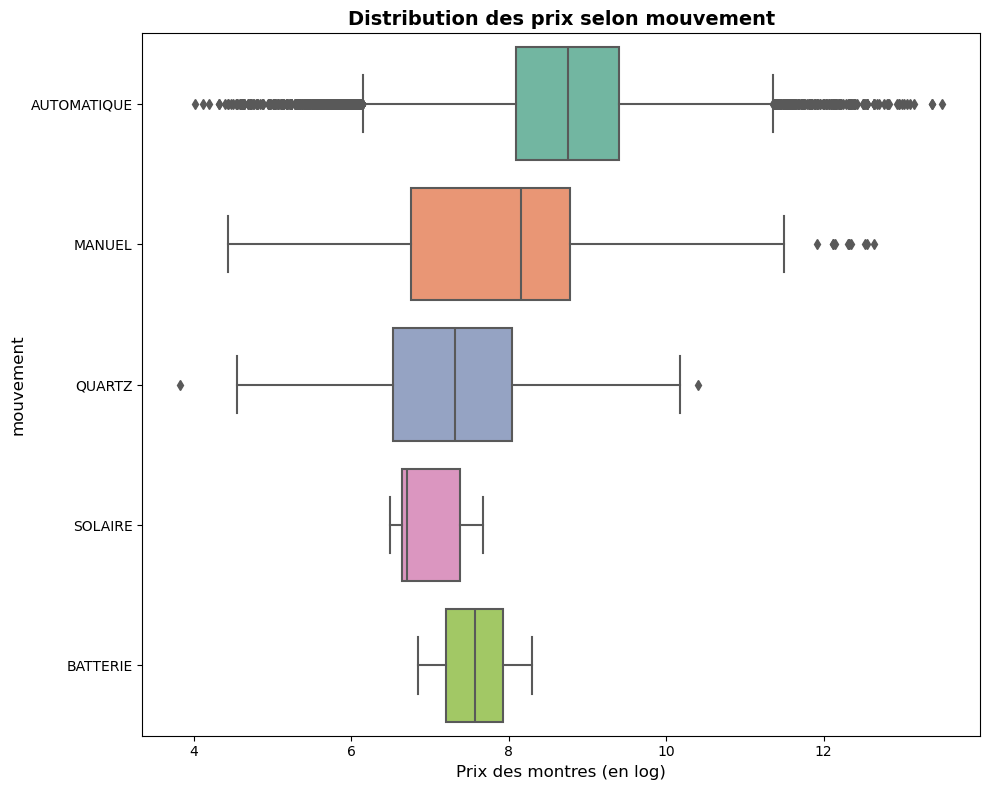

In [27]:
rep.boxplot('mouvement')

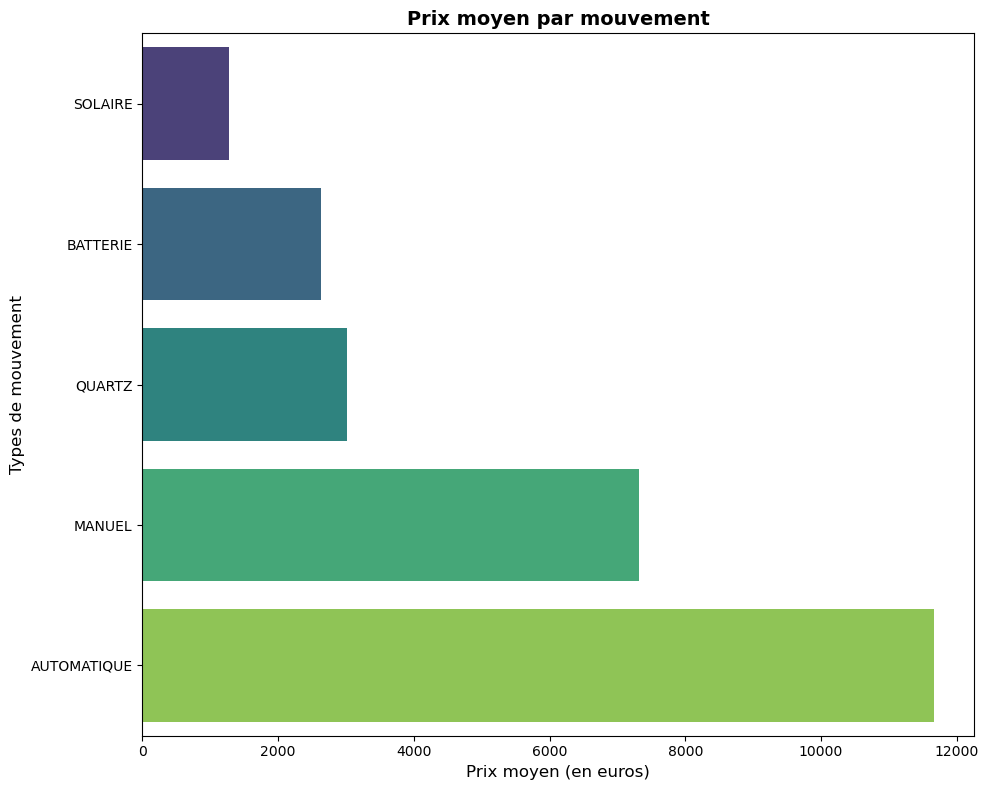

In [28]:
rep.barres('mouvement')

### Sexe

In [29]:
rep.tableau('sexe')

           Statistiques par Sexe            
┏━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Sexe  ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ HOMME │   12096.24 │    49.00 │    49.00 │
│ FEMME │   10033.42 │    90.00 │    90.00 │
└───────┴────────────┴──────────┴──────────┘

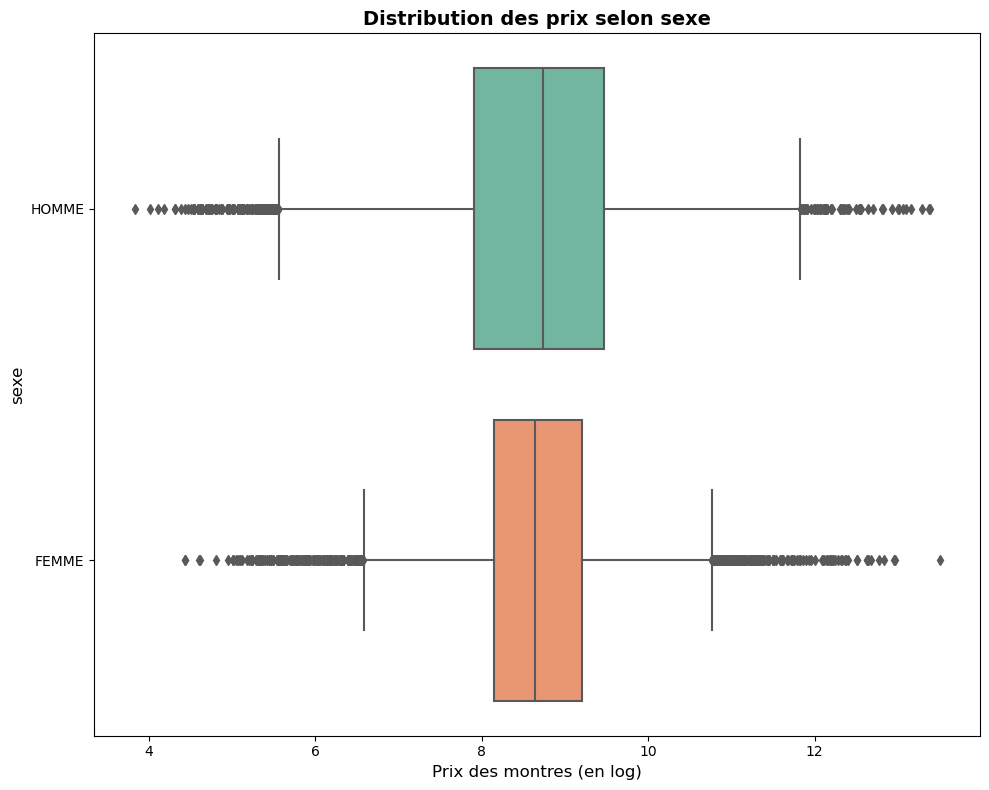

In [30]:
rep.boxplot('sexe')

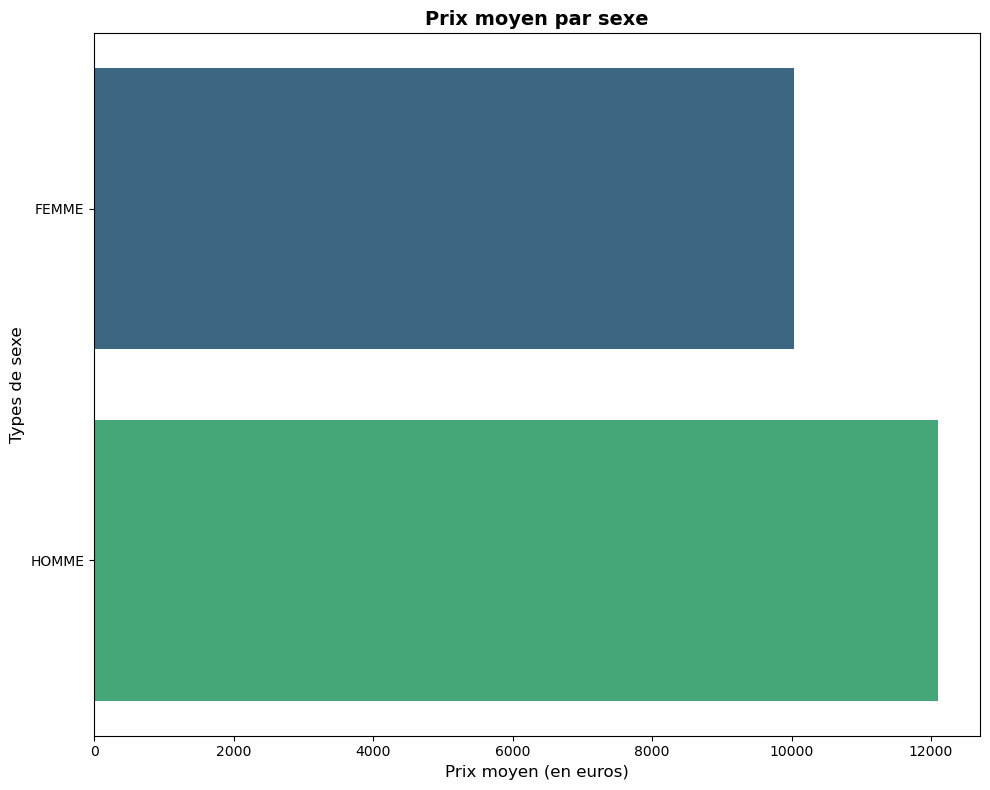

In [31]:
rep.barres('sexe')

# Marque 

In [32]:
rep.tableau('marque')

                  Statistiques par Marque                   
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃        Marque         ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│     RICHARD-MILLE     │  235473.26 │ 99900.00 │ 99900.00 │
│       FPJOURNE        │  133308.12 │ 51029.00 │ 51029.00 │
│      DE-BETHUNE       │   69900.00 │ 69900.00 │ 69900.00 │
│    PATEK-PHILIPPE     │   54670.28 │  2999.00 │  2999.00 │
│        URWERK         │   46072.00 │ 46072.00 │ 46072.00 │
│    AUDEMARS-PIGUET    │   45295.04 │  2000.00 │  2000.00 │
│    A-LANGE-&-SÖHNE    │   40212.97 │ 13300.00 │ 13300.00 │
│     HARRY-WINSTON     │   39272.50 │ 16946.00 │ 16946.00 │
│   MORITZ-GROSSMANN    │   29701.00 │ 29701.00 │ 29701.00 │
│         BOVET         │   26825.00 │ 25400.00 │ 25400.00 │
│  VAN-CLEEF-&-ARPELS   │   26360.00 │  7500.00 │  7500.00 │
│  VACHERON-CONSTANTIN  │   23338.22 │  2900.00 │  2900.00 │
│        BREGUET        │   21852.58 │  4250.00 │  4250.00 │
│     HMOSER-&-CIE      │   20589.00 │ 11489.00 │ 11489.00 │
│     ULYSSE-NARDIN     │   18169.37 │  3331.00 │  3331.00 │
│  PARMIGIANI-FLEURIER  │   18088.63 │  5696.00 │  5696.00 │
│     ROGER-DUBUIS      │   17034.73 │  5918.00 │  5918.00 │
│      JAQUET-DROZ      │   14496.92 │  4145.00 │  4145.00 │
│         ROLEX         │   13063.34 │   250.00 │   250.00 │
│        HUBLOT         │   12589.74 │  1400.00 │  1400.00 │
│        PIAGET         │   12238.82 │  1500.00 │  1500.00 │
│     FRANCK-MULLER     │   11917.35 │  1527.00 │  1527.00 │
│       BLANCPAIN       │   11334.28 │  1250.00 │  1250.00 │
│        CHOPARD        │   11064.03 │   349.00 │   349.00 │
│   GIRARD-PERREGAUX    │   11015.14 │  1100.00 │  1100.00 │
│     DE-GRISOGONO      │   10199.17 │  6500.00 │  6500.00 │
│         CORUM         │   10159.11 │  1370.00 │  1370.00 │
│     LOUIS-MOINET      │   10000.00 │ 10000.00 │ 10000.00 │
│        BULGARI        │    8255.94 │   809.00 │   809.00 │
│      JACOB-&-CO       │    8155.60 │  3990.00 │  3990.00 │
│         DIOR          │    7867.94 │  1200.00 │  1200.00 │
│   JAEGER-LECOULTRE    │    7802.65 │   550.00 │   550.00 │
│  GLASHÜTTE-ORIGINAL   │    7735.22 │  2600.00 │  2600.00 │
│        CARTIER        │    7464.52 │   495.00 │   495.00 │
│     GÉRALD-GENTA      │    7220.00 │  6900.00 │  6900.00 │
│          IWC          │    6768.72 │   700.00 │   700.00 │
│        PANERAI        │    6599.21 │  3446.00 │  3446.00 │
│       PEQUIGNET       │    6415.83 │   700.00 │   700.00 │
│        CHANEL         │    6385.14 │  1907.00 │  1907.00 │
│      GRAND-SEIKO      │    6306.86 │  1308.00 │  1308.00 │
│       BOUCHERON       │    6190.00 │  1990.00 │  1990.00 │
│      JORG-HYSEK       │    5697.25 │  2098.00 │  2098.00 │
│        ZENITH         │    5564.99 │    90.00 │    90.00 │
│        TIFFANY        │    5448.00 │  5448.00 │  5448.00 │
│        CHAUMET        │    5208.50 │   895.00 │   895.00 │
│   UNIVERSAL-GENÈVE    │    5057.97 │  1200.00 │  1200.00 │
│        GRAHAM         │    4991.00 │  2599.00 │  2599.00 │
│         OMEGA         │    4987.18 │    90.00 │    90.00 │
│      BEDAT-&-CO       │    4780.00 │  3567.00 │  3567.00 │
│       PERRELET        │    4423.00 │  1800.00 │  1800.00 │
│       BREITLING       │    4376.50 │   400.00 │   400.00 │
│    CARL-F-BUCHERER    │    4323.83 │  1200.00 │  1200.00 │
│          BRM          │    4099.67 │  3200.00 │  3200.00 │
│         TUDOR         │    3715.48 │   450.00 │   450.00 │
│        VULCAIN        │    3309.95 │  1290.00 │  1290.00 │
│      BELL-&-ROSS      │    3267.88 │  1250.00 │  1250.00 │
│       TAG-HEUER       │    3132.60 │   170.00 │   170.00 │
│    PORSCHE-DESIGN     │    3097.00 │  1250.00 │  1250.00 │
│         EBEL          │    2986.40 │   490.00 │   490.00 │
│     EBERHARD-&-CO     │    2733.11 │  1149.00 │  1149.00 │
│        HERMÈS         │    2718.54 │   650.00 │   650.00 │
│      JEANRICHARD      │    2666.0

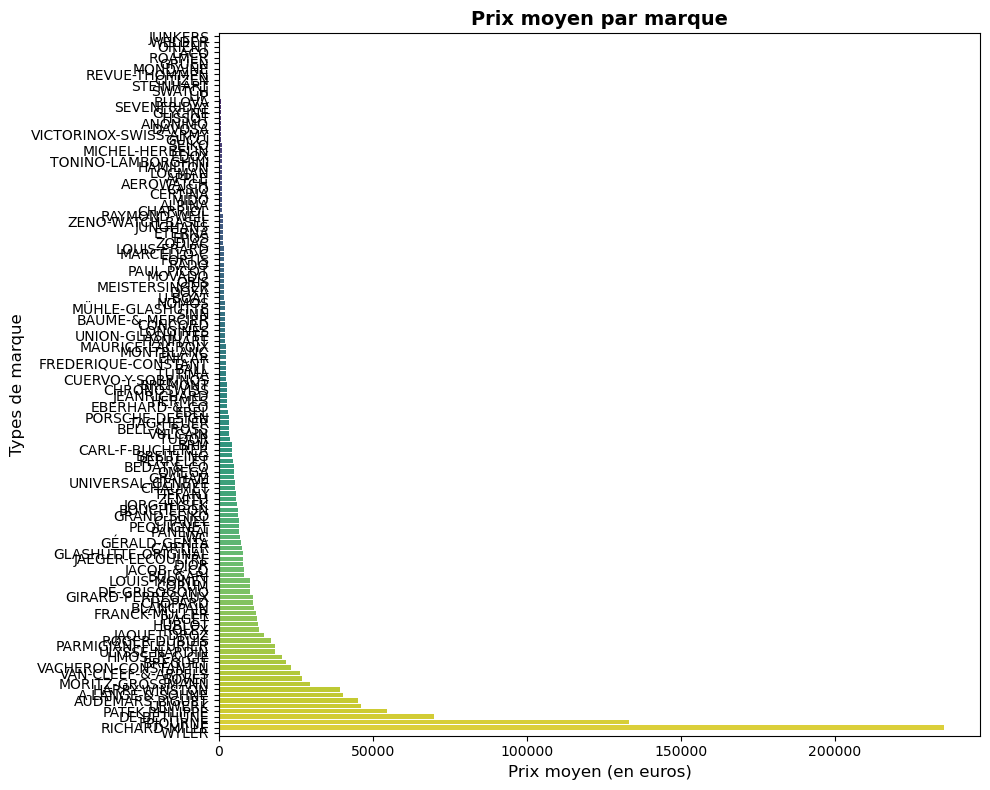

In [33]:
rep.barres('marque')

In [34]:
df['marque'][df['prix'] == df['prix'].max()] 

37344    PATEK-PHILIPPE
Name: marque, dtype: object

### Matiere boitier 

In [35]:
rep.tableau('matiere_boitier')

           Statistiques par Matiere_boitier           
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Matiere_boitier ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│     PLATINE     │   74994.00 │  1516.00 │  1516.00 │
│     OR_ROSE     │   41240.66 │   290.00 │   290.00 │
│    OR_BLANC     │   28103.72 │   750.00 │   750.00 │
│     CARBONE     │   25138.02 │   250.00 │   250.00 │
│    OR_ROUGE     │   19095.45 │  3799.00 │  3799.00 │
│    OR_JAUNE     │   15965.88 │   160.00 │   160.00 │
│     TANTALE     │   14655.00 │  7000.00 │  7000.00 │
│    PALLADIUM    │   11900.00 │ 11900.00 │ 11900.00 │
│    OR_ACIER     │    9337.45 │    90.00 │    90.00 │
│     TITANE      │    9277.23 │   234.00 │   234.00 │
│      ACIER      │    8475.13 │    65.00 │    65.00 │
│    CÉRAMIQUE    │    7530.87 │   209.00 │   209.00 │
│     BRONZE      │    4278.77 │   700.00 │   700.00 │
│    ALUMINIUM    │    3318.33 │   290.00 │   290.00 │
│     ARGENT      │    2277.57 │   135.00 │   135.00 │
│   PLAQUÉE_OR    │    1611.75 │   350.00 │   350.00 │
│  VERRE_SAPHIR   │    1237.00 │  1237.00 │  1237.00 │
│    PLASTIQUE    │     807.16 │    80.00 │    80.00 │
└─────────────────┴────────────┴──────────┴──────────┘

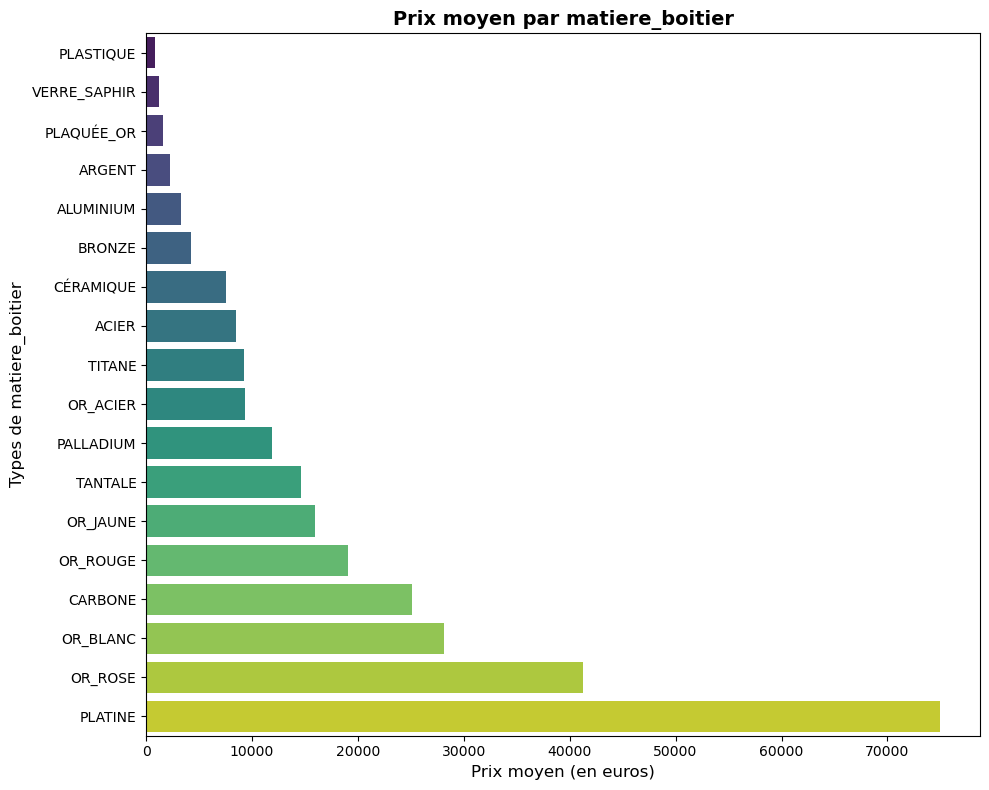

In [36]:
rep.barres('matiere_boitier')

### Matiere bracelet

In [37]:
rep.tableau('matiere_bracelet')

           Statistiques par Matiere_bracelet           
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Matiere_bracelet ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│     PLATINE      │   82508.21 │  4080.00 │  4080.00 │
│     OR_ROSE      │   66541.32 │   630.00 │   630.00 │
│        OR        │   31542.54 │   350.00 │   350.00 │
│     OR_BLANC     │   20807.53 │   250.00 │   250.00 │
│      SATIN       │   20113.93 │   750.00 │   750.00 │
│    CAOUTCHOUC    │   19307.67 │    80.00 │    80.00 │
│     OR_JAUNE     │   16053.32 │  1195.00 │  1195.00 │
│      ACIER       │    9615.44 │    65.00 │    65.00 │
│     OR_ACIER     │    9581.22 │   169.00 │   169.00 │
│    CÉRAMIQUE     │    8513.96 │   490.00 │   490.00 │
│    ALUMINIUM     │    7600.00 │  4950.00 │  4950.00 │
│      TITANE      │    7505.63 │   234.00 │   234.00 │
│     OR_ROUGE     │    6966.00 │  4000.00 │  4000.00 │
│       CUIR       │    6695.44 │    90.00 │    90.00 │
│  CUIRE_DE_VACHE  │    5791.45 │   200.00 │   200.00 │
│    PLASTIQUE     │    5713.78 │   120.00 │   120.00 │
│      ARGENT      │    5266.61 │   240.00 │   240.00 │
│     TEXTILE      │    4270.81 │   118.00 │   118.00 │
│  CUIR_AUTRUCHE   │    4091.45 │   275.00 │   275.00 │
│     SILICONE     │    3419.44 │   250.00 │   250.00 │
│      BRONZE      │    1843.00 │  1300.00 │  1300.00 │
│      REQUIN      │     395.00 │   395.00 │   395.00 │
└──────────────────┴────────────┴──────────┴──────────┘

In [38]:
rep.tableau('matiere_bracelet')

           Statistiques par Matiere_bracelet           
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Matiere_bracelet ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│     PLATINE      │   82508.21 │  4080.00 │  4080.00 │
│     OR_ROSE      │   66541.32 │   630.00 │   630.00 │
│        OR        │   31542.54 │   350.00 │   350.00 │
│     OR_BLANC     │   20807.53 │   250.00 │   250.00 │
│      SATIN       │   20113.93 │   750.00 │   750.00 │
│    CAOUTCHOUC    │   19307.67 │    80.00 │    80.00 │
│     OR_JAUNE     │   16053.32 │  1195.00 │  1195.00 │
│      ACIER       │    9615.44 │    65.00 │    65.00 │
│     OR_ACIER     │    9581.22 │   169.00 │   169.00 │
│    CÉRAMIQUE     │    8513.96 │   490.00 │   490.00 │
│    ALUMINIUM     │    7600.00 │  4950.00 │  4950.00 │
│      TITANE      │    7505.63 │   234.00 │   234.00 │
│     OR_ROUGE     │    6966.00 │  4000.00 │  4000.00 │
│       CUIR       │    6695.44 │    90.00 │    90.00 │
│  CUIRE_DE_VACHE  │    5791.45 │   200.00 │   200.00 │
│    PLASTIQUE     │    5713.78 │   120.00 │   120.00 │
│      ARGENT      │    5266.61 │   240.00 │   240.00 │
│     TEXTILE      │    4270.81 │   118.00 │   118.00 │
│  CUIR_AUTRUCHE   │    4091.45 │   275.00 │   275.00 │
│     SILICONE     │    3419.44 │   250.00 │   250.00 │
│      BRONZE      │    1843.00 │  1300.00 │  1300.00 │
│      REQUIN      │     395.00 │   395.00 │   395.00 │
└──────────────────┴────────────┴──────────┴──────────┘

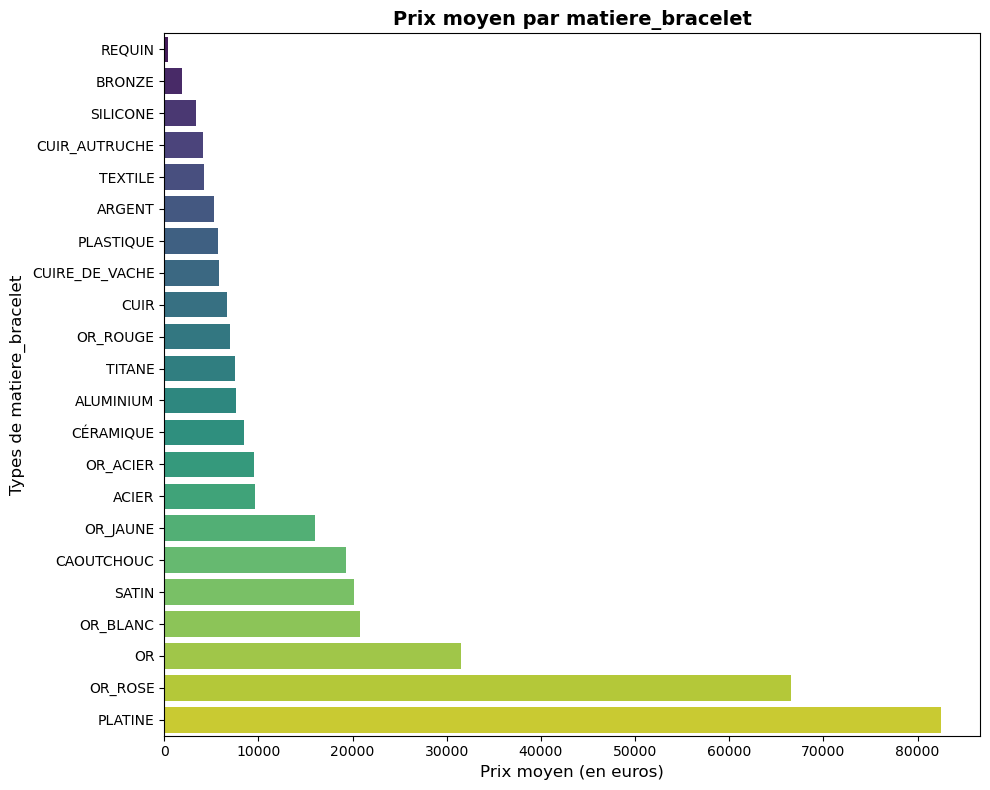

In [39]:
rep.barres('matiere_bracelet')

### Etat de la montre

In [40]:
rep.tableau('etat')

                 Statistiques par Etat                  
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃       Etat        ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ État non spécifié │   14629.09 │   135.00 │   135.00 │
│       Neuf        │   13953.94 │    80.00 │    80.00 │
│        Bon        │   10246.20 │    49.00 │    49.00 │
│   Satisfaisant    │    5287.46 │    80.00 │    80.00 │
│    Défectueux     │    4430.79 │   100.00 │   100.00 │
└───────────────────┴────────────┴──────────┴──────────┘

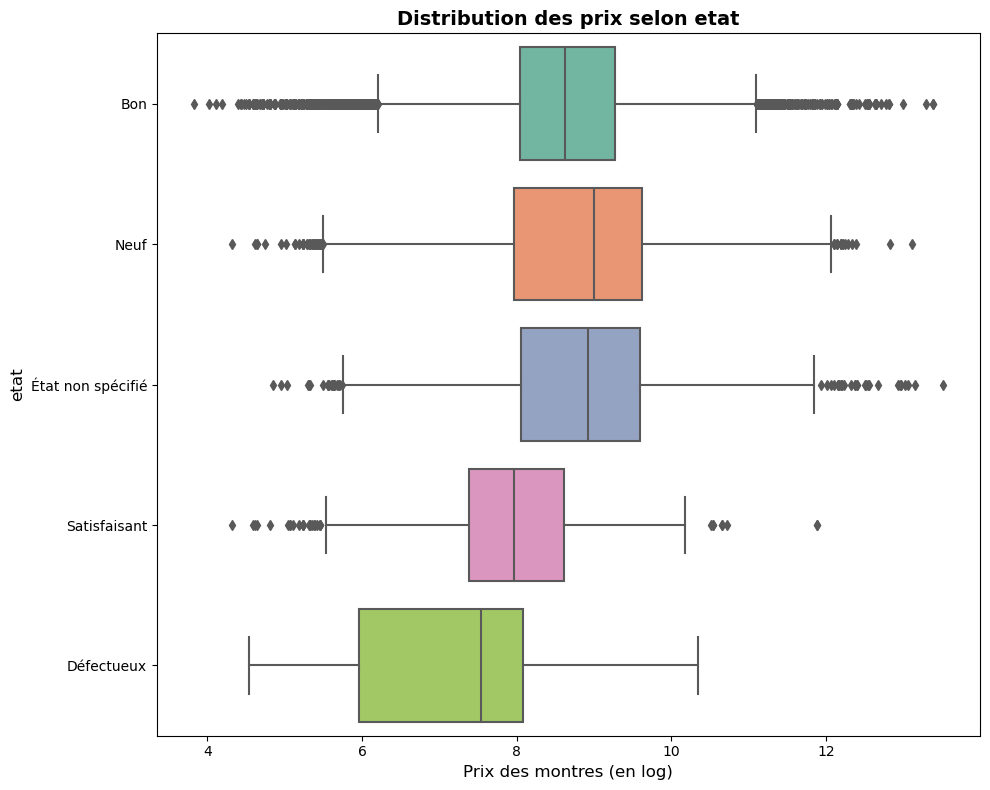

In [41]:
rep.boxplot('etat')

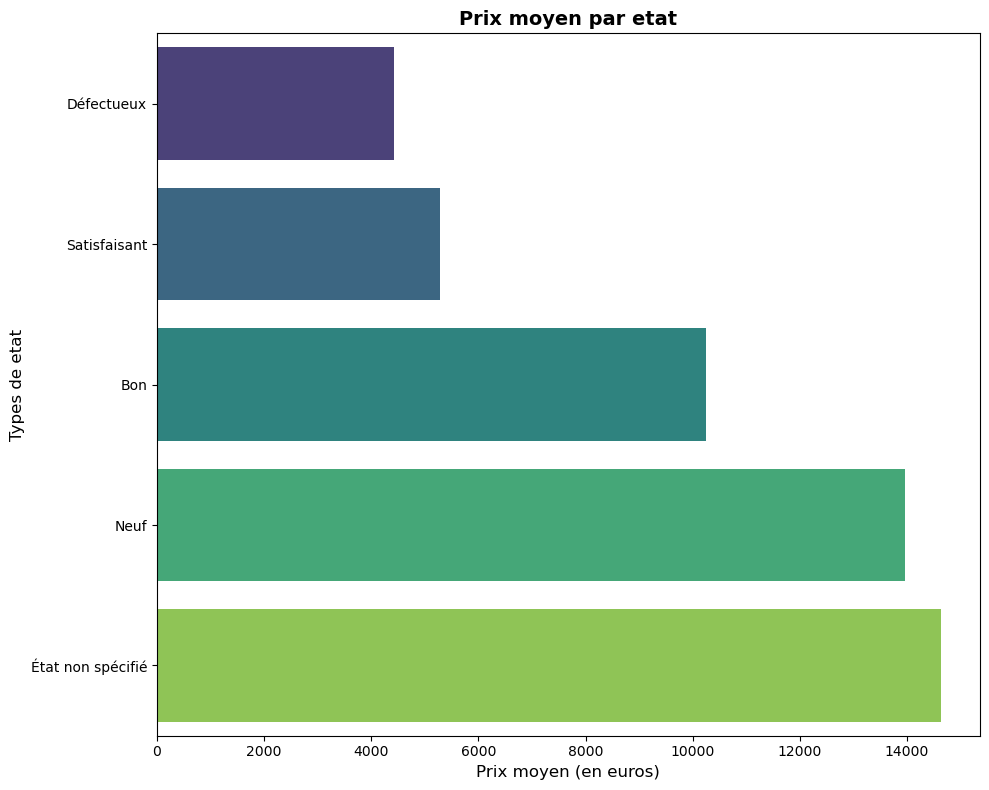

In [42]:
rep.barres('etat')

## matiere lunette : 

In [43]:
rep.tableau('matiere_lunette')

           Statistiques par Matiere_lunette           
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Matiere_lunette ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│     CARBONE     │   69413.03 │    90.00 │    90.00 │
│     OR_ROSE     │   27236.14 │   590.00 │   590.00 │
│     PLATINE     │   26162.32 │  1300.00 │  1300.00 │
│       OR        │   16522.60 │   160.00 │   160.00 │
│    CÉRAMIQUE    │   14439.26 │   209.00 │   209.00 │
│    OR_BLANC     │   12188.44 │   500.00 │   500.00 │
│     TITANE      │   10194.80 │   234.00 │   234.00 │
│      LISSE      │    8980.68 │  5499.00 │  5499.00 │
│    OR_JAUNE     │    8863.47 │   250.00 │   250.00 │
│      ACIER      │    8277.49 │    65.00 │    65.00 │
│    OR_ROUGE     │    6208.42 │  2750.00 │  2750.00 │
│    ALUMINIUM    │    4395.25 │   270.00 │   270.00 │
│     BRONZE      │    3512.50 │   800.00 │   800.00 │
│     ARGENT      │    3377.10 │   290.00 │   290.00 │
│    OR_ACIER     │    3340.36 │   169.00 │   169.00 │
│    PLASTIQUE    │    2355.88 │    80.00 │    80.00 │
│    TUNGSTÈNE    │    1635.57 │   370.00 │   370.00 │
│    PALLADIUM    │     550.00 │   550.00 │   550.00 │
└─────────────────┴────────────┴──────────┴──────────┘

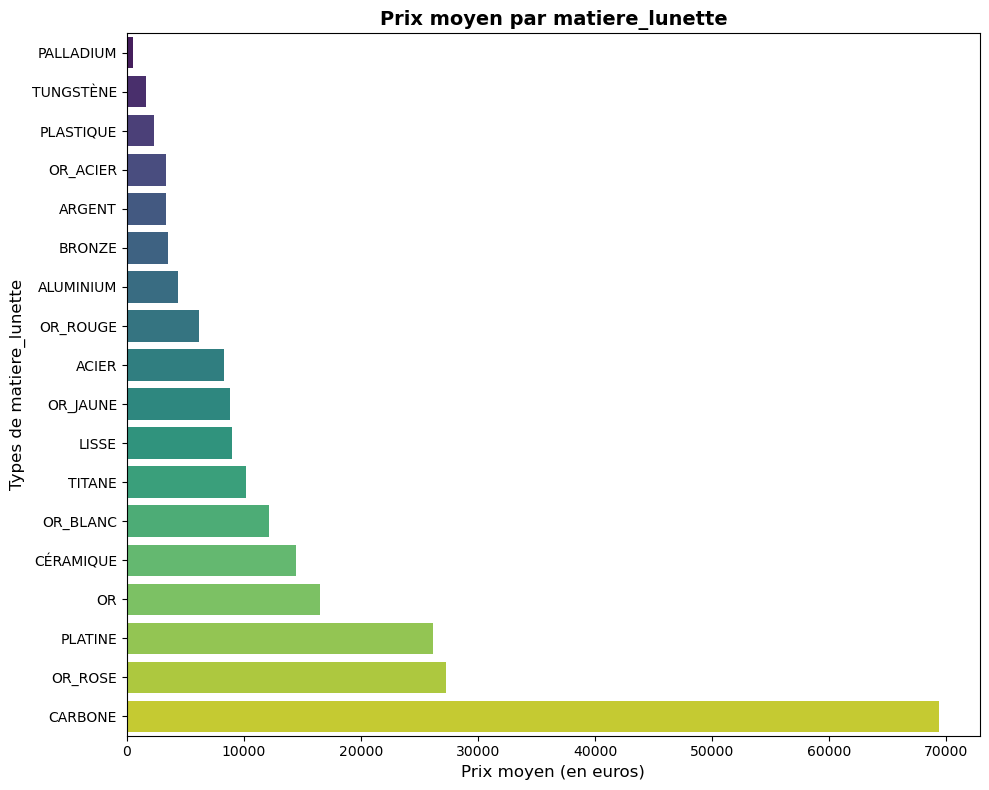

In [44]:
rep.barres('matiere_lunette')

### Matiere boucle

In [45]:
rep.tableau('matiere_boucle')

           Statistiques par Matiere_boucle           
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Matiere_boucle ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│    CARBONE     │   61910.94 │    90.00 │    90.00 │
│    PLATINE     │   27843.62 │  1516.00 │  1516.00 │
│       OR       │   14827.35 │   160.00 │   160.00 │
│   CÉRAMIQUE    │   14776.94 │   209.00 │   209.00 │
│     TITANE     │   10257.04 │   234.00 │   234.00 │
│     ACIER      │    7956.39 │    65.00 │    65.00 │
│    OR_ACIER    │    6597.62 │    90.00 │    90.00 │
│   ALUMINIUM    │    4720.61 │   270.00 │   270.00 │
│     BRONZE     │    3755.93 │  1190.00 │  1190.00 │
│     ARGENT     │    2357.83 │   106.00 │   106.00 │
│   PLASTIQUE    │    2282.54 │    80.00 │    80.00 │
│   TUNGSTÈNE    │    1299.75 │   370.00 │   370.00 │
│   PALLADIUM    │     550.00 │   550.00 │   550.00 │
└────────────────┴────────────┴──────────┴──────────┘

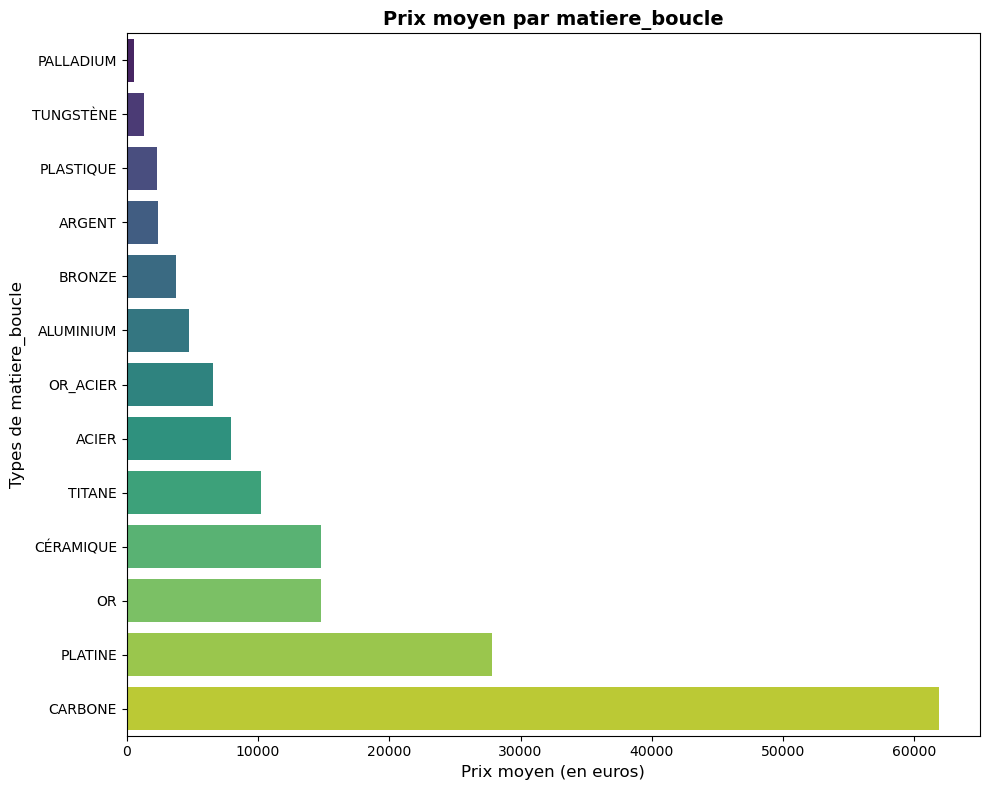

In [46]:
rep.barres('matiere_boucle')

### Boucle 

In [47]:
rep.tableau('boucle')

               Statistiques par Boucle                
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃     Boucle      ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│   DOUBLE_PLIS   │   14159.81 │    65.00 │    65.00 │
│      PLIS       │   12013.03 │    80.00 │    80.00 │
│ BOUCLE_ARDILLON │    7515.47 │    70.00 │    70.00 │
│ FERMOIR_BIJOUX  │    7423.26 │   240.00 │   240.00 │
│  PAS_DE_BOUCLE  │    4593.00 │   500.00 │   500.00 │
│ BOUCLE ARDILLON │    1407.00 │  1407.00 │  1407.00 │
└─────────────────┴────────────┴──────────┴──────────┘

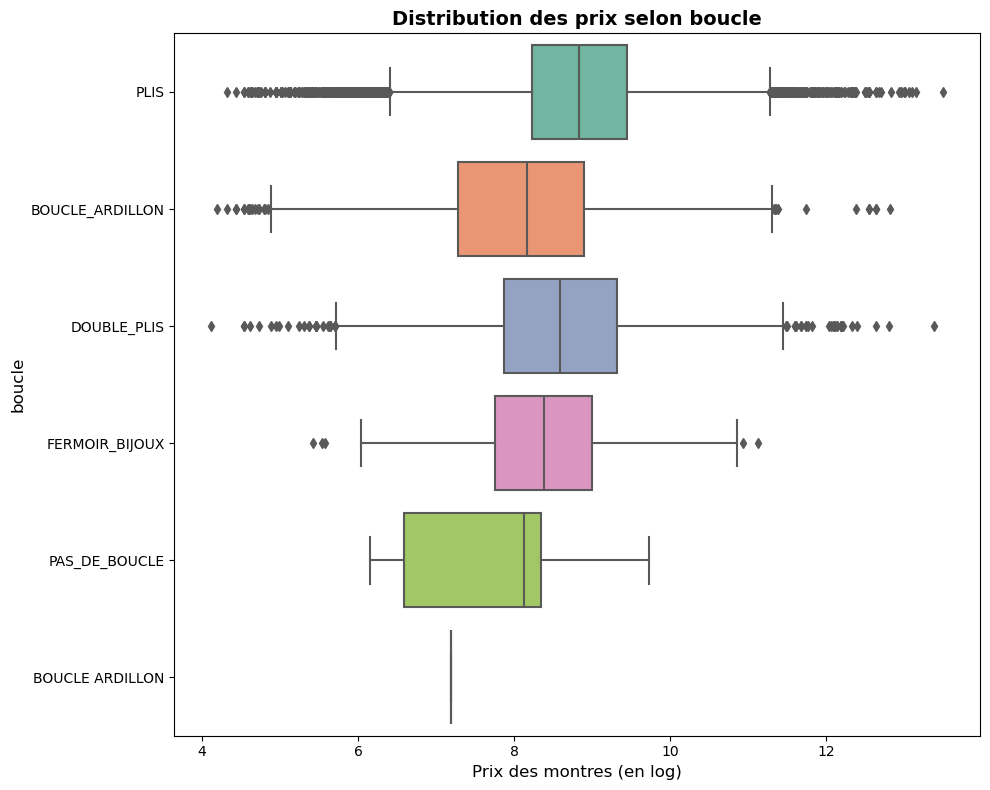

In [48]:
rep.boxplot('boucle')

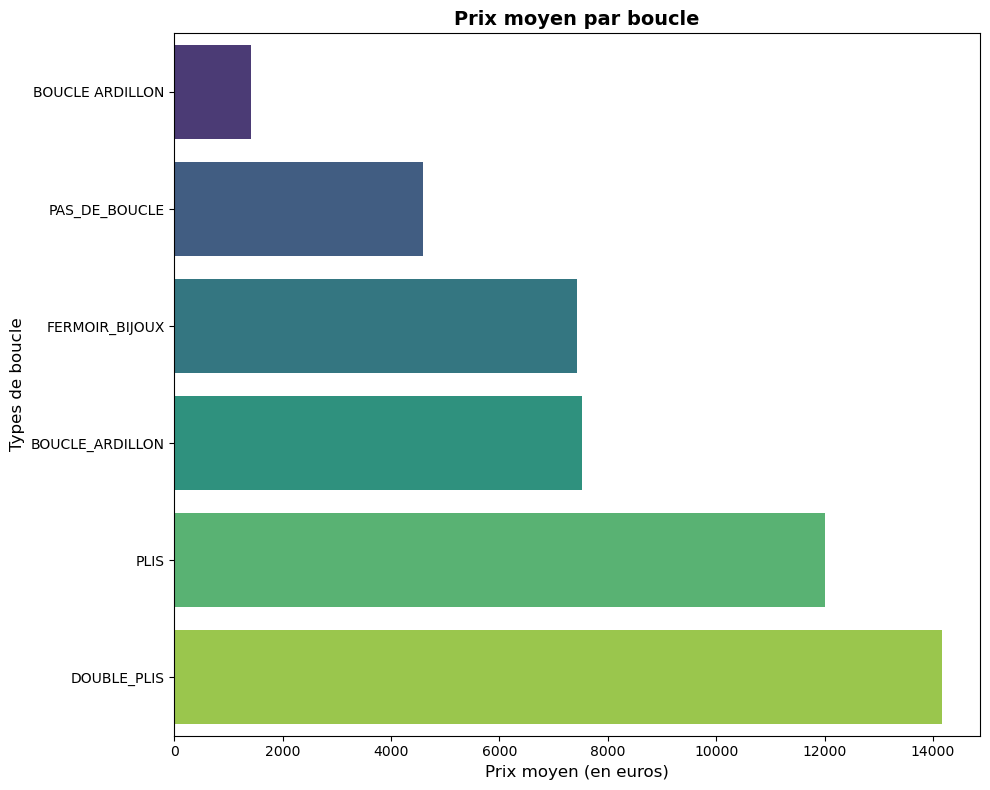

In [49]:
rep.barres('boucle')

# Nombre de complications 

In [50]:
rep.tableau('comptage_fonctions')

           Statistiques par Comptage_fonctions           
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Comptage_fonctions ┃ Prix moyen ┃ Prix min ┃ Prix max ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│        6.0         │   25426.06 │   299.00 │   299.00 │
│        2.0         │   12309.04 │    80.00 │    80.00 │
│        4.0         │   11950.04 │   140.00 │   140.00 │
│        1.0         │   11653.17 │    70.00 │    70.00 │
│        5.0         │   11280.99 │   320.00 │   320.00 │
│        0.0         │   10214.93 │    49.00 │    49.00 │
│        3.0         │    9974.68 │    80.00 │    80.00 │
│        7.0         │    6564.76 │   250.00 │   250.00 │
│        8.0         │    3979.67 │   120.00 │   120.00 │
│        12.0        │    1950.00 │  1950.00 │  1950.00 │
│        9.0         │    1750.00 │  1750.00 │  1750.00 │
│        19.0        │    1468.00 │  1468.00 │  1468.00 │
│        10.0        │    1190.00 │  1100.00 │  1100.00 │
└────────────────────┴────────────┴──────────┴──────────┘

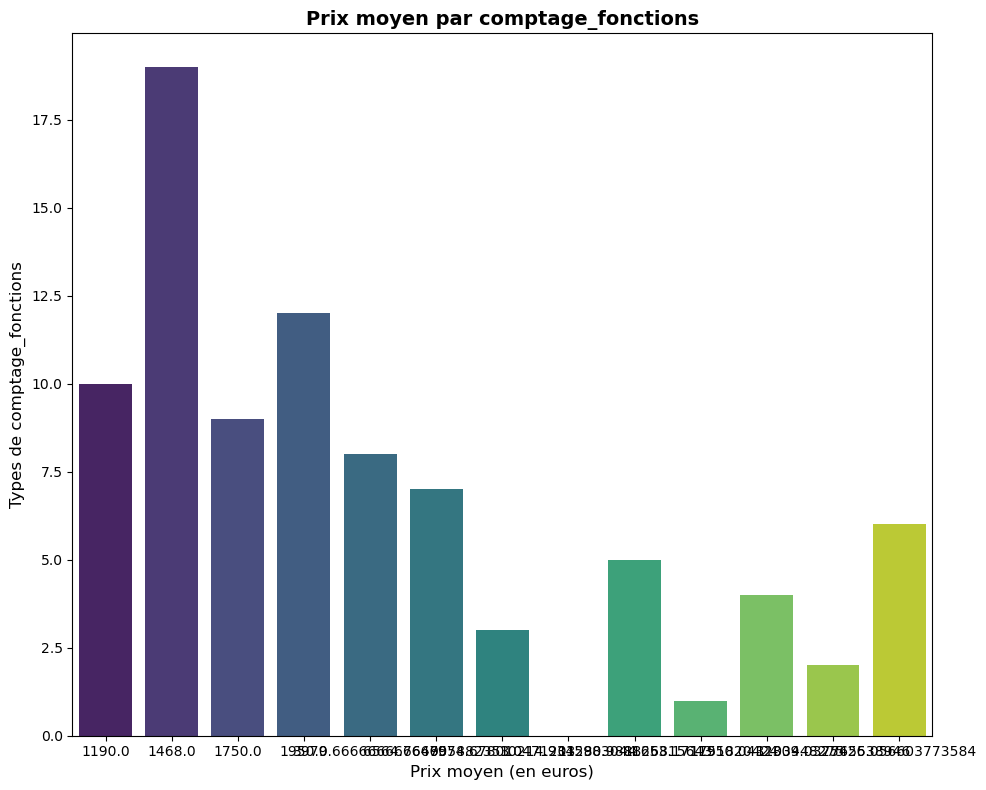

In [51]:
rep.barres('comptage_fonctions')

# Diamètre

<Axes: xlabel='diametre', ylabel='prix'>

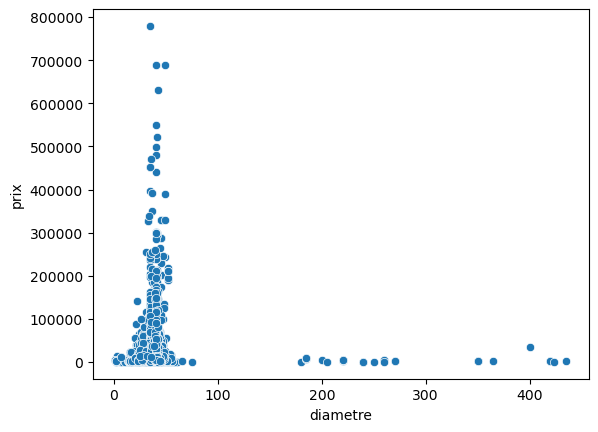

In [52]:
sns.scatterplot(x=df.diametre, y=df.prix)

# Etencheite

<Axes: xlabel='etencheite', ylabel='prix'>

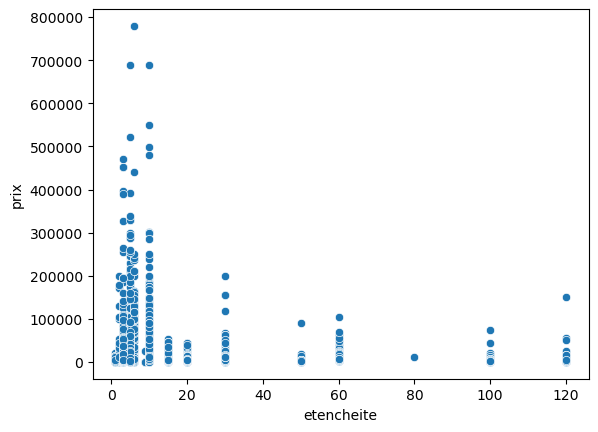

In [53]:
sns.scatterplot(x=df.etencheite, y=df.prix)

# Réserve de marche

<Axes: xlabel='reserve_de_marche', ylabel='prix'>

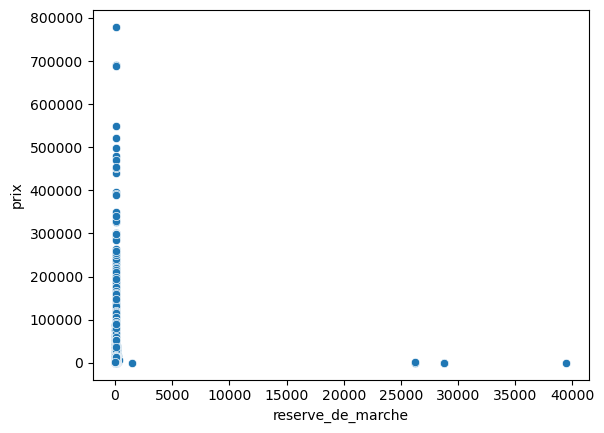

In [54]:
sns.scatterplot(x=df.reserve_de_marche, y=df.prix)

In [56]:
df.to_excel("/Users/f.b/Desktop/Data_Science/watch_market/watch_price_prediction/data/processed/propre.xlsx")